<a href="https://colab.research.google.com/github/caiociardelli/sphglltools/blob/main/doc/9_Inverse_distance_weighting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inverse distance weighting

Author: Caio Ciardelli
<br>
<br>
If you use this Jupyter, please, cite the following paper:
<br>
<br>
Ciardelli, C., Bozdağ, E., Peter, D., and van der Lee, S., 2021. SphGLLTools: A toolbox for visualization of large seismic model files based on 3D spectral-element meshes. Computer & Geosciences, submitted.
<br>
<br>

#####1D IDW interpolation

*Inverse distance weighting* (IDW) is an interpolation method that works in any number of dimensions and with any data set distribution. In general, it does not provide a high-quality result. However, the simplicity, robustness, and flexibility of IDW make it useful for applications in which we cannot apply other methods. Besides, unlike the *nearest-neighbor algorithm*, it provides a smooth interpolation.
<br>
<br>
The basic principle that underpins the method is the intuitive idea that, when interpolating a value, the closer sample points should receive larger weights than the ones located further away.
<br>
<br>
Following *Shepard (1968)*, we can calculate an interpolated value $u\,(x)$ as a function of a set of $n\,+\,1$ data points in $\mathbb{R}^{2}\,(x_0,\,y_0),\,(x_1,\,y_1)\dots(x_n,\,y_n)$ using the formula:
<br>
<br>
\begin{equation}
  u\,(x)
  \,=\,
  \begin{cases}
    \displaystyle \frac{\sum_{i\,=\,0}^n w_i\,(x)\,y_i}{\sum_{i\,=\,0}^n w_i\,(x)} \quad &\text{if}\quad d\,(x,\,x_i)\,\ne\,0 \quad \forall\,\, i\\
    \, y_i \quad &\text{if}\quad d\,(x,\,x_i)\,=\,0 \quad \text{for some}\,\,i,
  \end{cases}
\end{equation}
<br>
<br>
where
<br>
<br>
\begin{equation}
  w_i\,(x)
  \,=\,\frac{1}{{d\,(x,\,x_i)}^p}
  \qquad\text{and}\qquad
  d\,(x,\,x_i)
  \,=\,\left|x\,-\,x_i\right|
\end{equation}
<br>
<br>

In [ ]:
def iDW1D (x, xn, yn, p = 2):
  """
  Returns interpolated value at
  x using the IDW method
  """
  N = x.size
  
  u = np.empty (N)

  for i in range (N):

    d = np.abs (x[i] - xn) ** p

    if d.min () == 0:

      u[i] = yn[d.argmin ()]

    else:

      w = 1.0 / d

      u[i] = np.sum (w * yn) / np.sum (w)

  return u

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set the parameters below

# N: number of points

# pmax: maximum value of p

# xn: nodes x values
# yn: nodes y values

if __name__ == "__main__":

  N = 1000
  
  pmax = 5

  xn = np.array ([0.0, 1.0, 2.0, 3.0, 4.0])
  yn = np.array ([3.1, 1.7, 2.5, 2.9, 2.6])

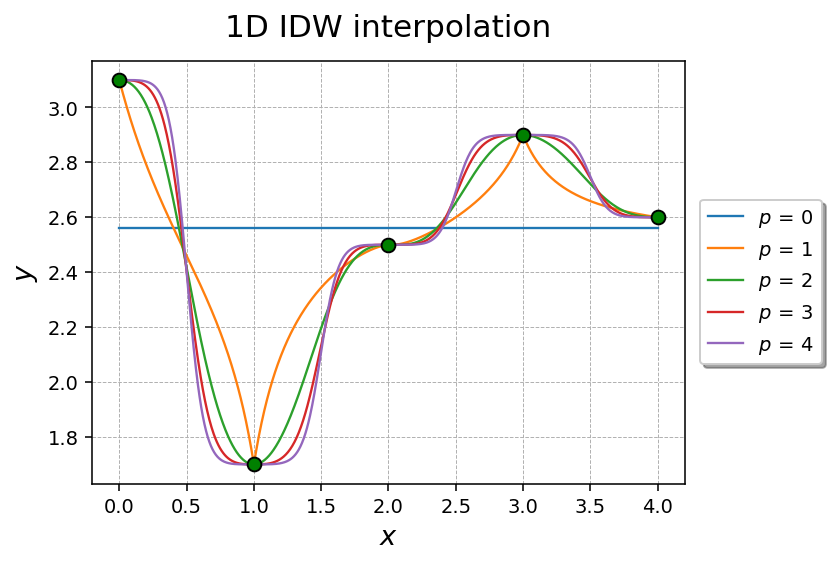

In [ ]:
if __name__ == "__main__":

  x = np.linspace (xn[0], xn[-1], N)

  fig = plt.figure (figsize = (6, 4), dpi = 140)

  for p in range (pmax):

    u = iDW1D (x, xn, yn, p)

    plt.plot (x, u, linewidth = 1.2,
              label = r'$p\,=\,{}$'.format (p))
  
  plt.scatter (xn, yn, marker = 'o', s = 50, facecolor = 'green',
               edgecolor = 'black', linewidth = 1, zorder = 3)
  plt.xlabel (r'$x$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
  plt.grid (linestyle = 'dashed', linewidth = 0.5)
  plt.title ('1D IDW interpolation', fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

####2D IDW interpolation

Given a set of $(m\,+\,1)(n\,+\,1)$ points in $\mathbb{R}^{3}\,(x_{00},\,y_{00},\,z_{00}),\,(x_{01},\,y_{01},\,z_{01})...(x_{m\,-\,1n},\,y_{m\,-\,1n},\,z_{m\,-\,1n})\,(x_{mn},\,y_{mn},\,z_{mn})$ we can calculate an interpolated value $u\,(x,\,y)$ using the formula:
<br>
<br>
\begin{equation}
  u\,(x,\,y)
  \,=\,
  \begin{cases}
    \displaystyle \frac{\sum_{i\,=\,0}^m \sum_{j\,=\,0}^n w_{ij}\,(x,\,y)\,z_{ij}}{\sum_{i\,=\,0}^m \sum_{j\,=\,0}^n w_{ij}\,(x,\,y)} \quad &\text{if}\quad d\,(x,\,y,\,x_{ij},\,y_{ij})\,\ne\,0 \quad \forall\,\, i,\,j\\
    \, z_{ij} \quad &\text{if}\quad d\,(x,\,y,\,x_{ij},\,y_{ij})\,=\,0 \quad \text{for some}\,\,i,\,j,
  \end{cases}
\end{equation}
<br>
<br>
where
<br>
<br>
\begin{equation}
  w_{ij}\,(x,\,y)
  \,=\,\frac{1}{{d\,(x,\,y,\,x_{ij},\,y_{ij})}^p}
  \qquad\text{and}\qquad
  d\,(x,\,y,\,x_{ij},\,y_{ij})
  \,=\,\sqrt{(x\,-\,x_{ij})^2\,+\,(y\,-\,y_{ij})^2}
\end{equation}
<br>
<br>

In [ ]:
def iDW2D (xx, yy, Xn, Yn, Zn, p = 2):
  """
  Returns interpolated value at
  x using the IDW method
  """
  Nx, Ny = xx.shape
  
  u = np.empty ((Nx, Ny))

  for i in range (Nx):

    for j in range (Ny):

      d = np.sqrt ((xx[i, j] - Xn) ** 2 +\
                   (yy[i, j] - Yn) ** 2) ** p

      if d.min () == 0:

        u[i, j] = Zn[np.unravel_index (d.argmin (), d.shape)]

      else:

        w = 1.0 / d

        u[i, j] = np.sum (w * Zn) / np.sum (w)

  return u

In [ ]:
# Set the parameters below

# Nx: number of points in the x direction
# Ny: number of points in the y direction

# Xn: nodes x values for all (y, z) combinations
# Yn: nodes y values for all (x, z) combinations
# Zn: nodes z values for all (x, y) combinations

if __name__ == "__main__":

  Nx = 200
  Ny = 200

  Xn = np.array ([[0.1, 1.0, 1.9, 3.0, 4.0],
                  [0.1, 0.9, 2.0, 3.1, 4.1],
                  [0.0, 1.0, 2.0, 3.0, 4.0],
                  [0.1, 1.0, 1.9, 2.9, 4.0],
                  [0.0, 0.9, 2.0, 3.0, 3.9]])

  Yn = np.array ([[2.9, 3.0, 3.0, 3.0, 3.0],
                  [4.0, 4.1, 4.0, 3.9, 4.0],
                  [5.0, 4.9, 4.9, 5.0, 5.1],
                  [6.1, 6.0, 6.0, 5.9, 5.9],
                  [7.1, 7.0, 7.0, 6.9, 7.0]])

  Zn = np.array ([[3.1, 1.7, 2.5, 2.9, 2.6],
                  [2.8, 1.9, 2.1, 2.7, 2.6],
                  [2.5, 2.3, 2.2, 2.7, 2.9],
                  [2.2, 2.6, 2.5, 2.4, 3.1],
                  [2.0, 2.7, 3.1, 2.0, 3.0]])

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

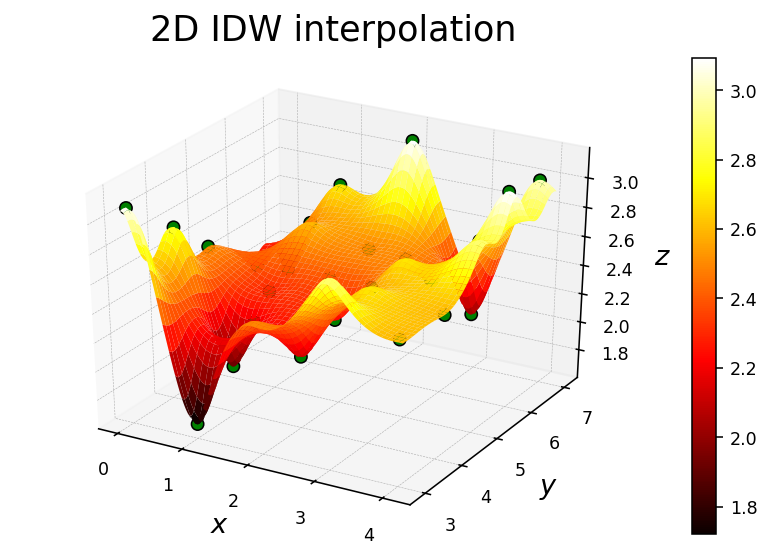

In [ ]:
if __name__ == "__main__":

  xmin = min (Xn.ravel ())
  xmax = max (Xn.ravel ())
  ymin = min (Yn.ravel ())
  ymax = max (Yn.ravel ())

  x = np.linspace (xmin, xmax, Nx)
  y = np.linspace (ymin, ymax, Ny)

  xx, yy = np.meshgrid (x, y)
  
  zz = iDW2D (xx, yy, Xn, Yn, Zn)

  fig = plt.figure (figsize = (6, 4), dpi = 140)
  ax = fig.gca (projection = '3d')

  surf = ax.plot_surface (xx, yy, zz, cmap = cm.hot, zorder = 1)

  ax.scatter (Xn, Yn, Zn, marker = 'o', s = 40,
              facecolor = 'green', edgecolor = 'black',
              linewidth = 0.8, alpha = 1, zorder = 2)

  ax.set_xlabel (r'$x$', fontsize = 14)
  ax.set_ylabel (r'$y$', fontsize = 14)
  ax.set_zlabel (r'$z$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 9)
  plt.tick_params (axis = 'y', labelsize = 9)
  plt.tick_params (axis = 'z', labelsize = 9)
  plt.rcParams['grid.linewidth'] = 0.3
  plt.rcParams['grid.linestyle'] = 'dashed'
  plt.title ('2D IDW interpolation', fontsize = 18, y = 1.1)
  cbar = plt.colorbar (surf)
  cbar.ax.tick_params (labelsize = 9)

  plt.subplots_adjust (left = 0.05, bottom = 0.05, top = 0.9, right = 1.0)

  plt.show ()


The same idea can be generalized to any number of dimensions for interpolating a set of data points in $\mathbb{R}^{n}$.
<br>
<br>

####References

CMRP Software. “GEOMS2.” / Wiki / Inverse Weighted Distance, 2020, https://sourceforge.net/p/geoms2/wiki/Inverse%20weighted%20distance/ [Accessed 6 August 2020].
<br>
<br>
“Inverse distance weighting.” *Wikipedia*, Wikimedia Foundation, 13 Dec. 2019, https://en.wikipedia.org/wiki/Inverse_distance_weighting [Accessed 6 August 2020].
<br>
<br>
Shepard, D. (1968). *A two-dimensional interpolation function for irregularly-spaced data.* In Proceedings of the 1968 23rd ACM national conference (pp. 517-524).
